#Leitura do DataSet

In [ ]:
# Importação do Google Drive
from google.colab import drive

# Bibliotecas para análise de dados e visualização
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas para manipulação de modelos de árvore de decisão e visualização
from sklearn.tree import export_graphviz
import graphviz
from sklearn.tree import DecisionTreeClassifier  # Ou DecisionTreeRegressor, dependendo do seu problema

# Bibliotecas para tratamento de dados desbalanceados
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Bibliotecas auxiliares
from collections import Counter

# Métricas de avaliação
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score, classification_report, roc_curve


In [ ]:

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_train = '/content/drive/MyDrive/lending/train.csv'
path_test = '/content/drive/MyDrive/lending/test.csv'

In [ ]:
df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)
df_train

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x52,x53,x54,x55,x56,x57,x58,x59,x60,y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001128,NaN,0
1,0.433333,2.025665e-06,0.036896,NaN,0.202035,0.000000,1.487062e-07,0.863415,0.333333,0.435244,...,0.004409,0.016618,3.786029e-07,0.001540,NaN,1.599900e-06,0.000000,NaN,0.000000,1
2,0.600000,1.503073e-02,0.064639,NaN,0.096657,0.000000,1.478698e-07,0.954888,0.633333,0.382166,...,0.000807,0.013685,1.074924e-07,0.000770,NaN,5.333333e-01,0.000702,NaN,0.000000,1
3,0.333333,1.555804e-07,0.056000,NaN,0.055959,0.000000,1.120742e-07,0.512857,0.333333,0.382166,...,0.000000,0.006843,1.839721e-07,0.000257,NaN,9.990000e-08,0.000379,NaN,0.066667,0
4,0.833333,8.325896e-07,0.090909,NaN,0.211483,0.000000,3.115530e-07,0.873213,0.666667,0.433121,...,0.001829,0.024438,8.865658e-08,0.000513,0.000002,4.699000e-07,0.000001,NaN,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152033,0.233333,5.770430e-07,0.114967,0.048920,0.326308,0.001919,1.151014e-08,0.639834,0.533333,0.454352,...,0.000000,0.034213,NaN,0.001540,NaN,3.055000e-07,0.004370,0.001288,0.100000,1
152034,0.233333,5.747985e-07,0.113082,0.048920,0.322674,0.001919,6.740689e-09,0.986754,0.366667,0.443206,...,0.000000,0.034213,NaN,0.001540,NaN,3.055000e-07,0.004277,0.001288,0.000000,1
152035,0.800000,1.597657e-06,0.013962,0.219988,0.263808,0.006501,3.039188e-07,0.769566,0.900000,0.358280,...,0.000001,0.007820,NaN,0.003338,NaN,4.090000e-07,0.000000,0.005556,0.000000,1
152036,0.700000,2.142396e-07,0.083744,0.032713,0.091570,0.003921,1.385943e-07,0.743508,0.266667,0.213854,...,0.000000,0.006843,6.990711e-09,0.004108,NaN,6.887000e-08,0.000235,0.001866,0.000000,0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152038 entries, 0 to 152037
Data columns (total 62 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      151333 non-null  float64
 1   x1      152037 non-null  float64
 2   x2      152037 non-null  float64
 3   x3      71762 non-null   float64
 4   x4      152037 non-null  float64
 5   x5      152037 non-null  float64
 6   x6      146648 non-null  float64
 7   x7      152037 non-null  float64
 8   x8      149891 non-null  float64
 9   x9      147583 non-null  float64
 10  x10     151937 non-null  float64
 11  x11     71762 non-null   float64
 12  x12     151333 non-null  float64
 13  x13     151937 non-null  float64
 14  x14     152037 non-null  float64
 15  x15     149943 non-null  float64
 16  x16     71762 non-null   float64
 17  x17     152037 non-null  float64
 18  x18     146412 non-null  float64
 19  x19     151333 non-null  float64
 20  x20     151876 non-null  float64
 21  x21     15

In [ ]:
pd.set_option('display.max_columns', None)
print(df_train.describe())

                  x0            x1             x2            x3  \
count  151333.000000  1.520370e+05  152037.000000  71762.000000   
mean        0.654601  1.051418e-03       0.194713      0.066569   
std         0.252200  8.748951e-03       0.193395      0.076830   
min         0.000000  0.000000e+00       0.000000      0.000000   
25%         0.500000  2.417643e-07       0.041667      0.020308   
50%         0.700000  5.023550e-07       0.122449      0.042917   
75%         0.833333  1.095194e-06       0.295635      0.082333   
max         1.000000  1.000000e+00       1.000000      1.000000   

                  x4             x5            x6             x7  \
count  152037.000000  152037.000000  1.466480e+05  152037.000000   
mean        0.163635       0.007806  2.730345e-04       0.724343   
std         0.121331       0.016800  9.433906e-03       0.219183   
min         0.000000       0.000000  0.000000e+00       0.000000   
25%         0.071948       0.000000  4.685601e-08       





# Escolhendo as Features mais importantes



In [ ]:
# Supondo que a coluna alvo (y) se chama 'target'
target_column = 'y'

# Calculando a correlação de cada coluna X com y
correlations = {}
for col in df_train.columns:
    if col != target_column:  # Ignora a coluna y
        correlations[col] = df_train[col].corr(df_train[target_column])

# Convertendo em um DataFrame para melhor visualização
correlation_df = pd.DataFrame(correlations.items(), columns=['Feature', 'Correlation with target'])

# Exibindo as maiores correlações
correlation_df.sort_values(by='Correlation with target', ascending=False, inplace=True)

# import ace_tools as tools; tools.display_dataframe_to_user(name="Correlation DataFrame", dataframe=correlation_df)


In [ ]:
correlation_df.head(10)

,Feature,Correlation with target
0,x0,0.242806
19,x19,0.193561
8,x8,0.174834
21,x21,0.143392
4,x4,0.121037
10,x10,0.100141
3,x3,0.086650
43,x43,0.075444
60,x60,0.075415
42,x42,0.067229


# Treino Puro

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from collections import Counter

# Separar features (X) e alvo (y)
X = df_train.drop(columns=[target_column])
y = df_train[target_column]

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar o modelo de árvore de decisão
model = DecisionTreeClassifier(random_state=42)

# Treinar o modelo com os dados "crus" (sem pré-processamento adicional)
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
print(f"Distribuição original das classes: {Counter(y_train)}")

# Acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

# Precisão
precision = precision_score(y_test, y_pred, average='weighted')
print("Precisão:", precision)

# Recall (revocação)
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-Score:", f1)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:\n", conf_matrix)

# Relatório de classificação completo
print(f"Relatório de classificação:\n{classification_report(y_test, y_pred)}")



Distribuição original das classes: Counter({1: 104108, 0: 17522})
Acurácia: 0.7986056300973428
Precisão: 0.803536348549789
Recall: 0.7986056300973428
F1-Score: 0.8010148708210677
Matriz de Confusão:
 [[ 1402  2933]
 [ 3191 22882]]
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.31      0.32      0.31      4335
           1       0.89      0.88      0.88     26073

    accuracy                           0.80     30408
   macro avg       0.60      0.60      0.60     30408
weighted avg       0.80      0.80      0.80     30408



As 20 features mais importantes:
   Feature  Importance
0       x0    0.074736
5       x5    0.030174
25     x25    0.028025
7       x7    0.026971
11     x11    0.026779
12     x12    0.025512
40     x40    0.023976
8       x8    0.023285
23     x23    0.023285
33     x33    0.023074
10     x10    0.022222
15     x15    0.021623
18     x18    0.021430
2       x2    0.021063
59     x59    0.021043
9       x9    0.020973
43     x43    0.020920
21     x21    0.020902
3       x3    0.020491
17     x17    0.020486


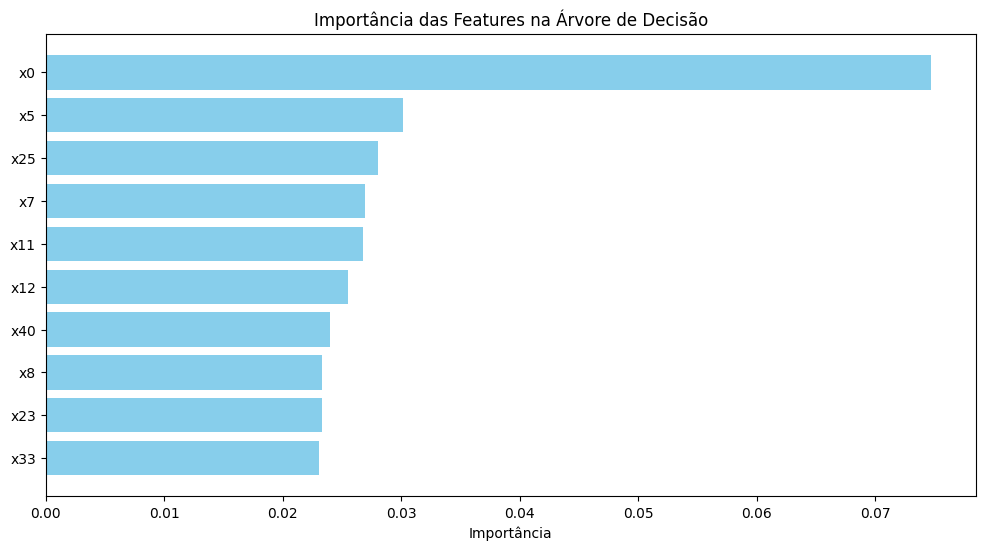

In [ ]:
import matplotlib.pyplot as plt

# Obter as importâncias das features
importances = model.feature_importances_

# Criar um DataFrame para visualizar as importâncias
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Ordenar o DataFrame pelas importâncias
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Exibir as 20 features mais importantes
print("As 20 features mais importantes:")
print(importance_df.head(20))

# Plotar as importâncias das features
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'].head(10), importance_df['Importance'].head(10), color='skyblue')
plt.xlabel('Importância')
plt.title('Importância das Features na Árvore de Decisão')
plt.gca().invert_yaxis()  # Inverter o eixo y para mostrar a feature mais importante no topo
plt.show()


Estatísticas da coluna 'x15':
count    149943.000000
mean          0.036825
std           0.031177
min           0.000000
25%           0.017608
50%           0.028694
75%           0.046493
max           1.000000
Name: x15, dtype: float64

Contagem de NaN: 2095
Porcentagem de NaN: 1.38%


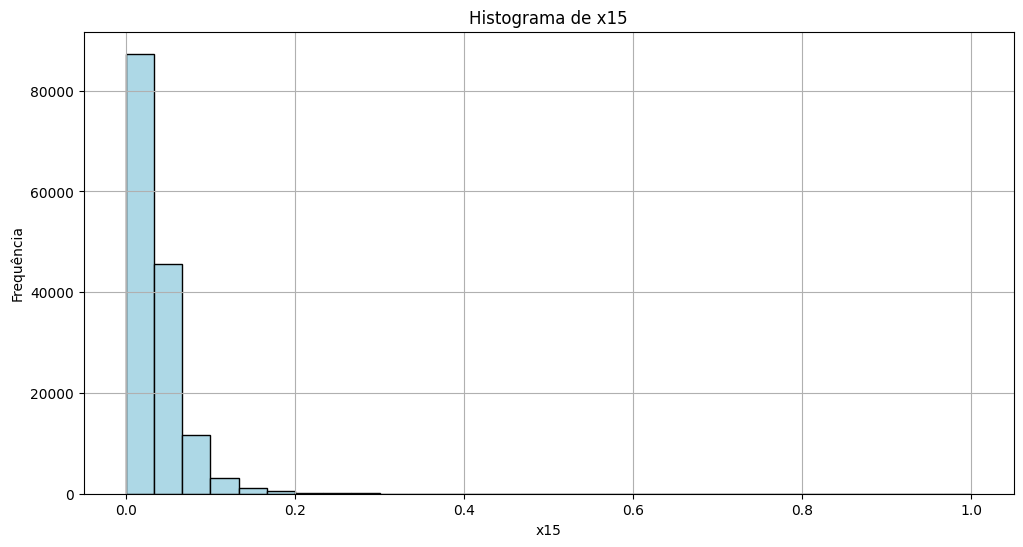

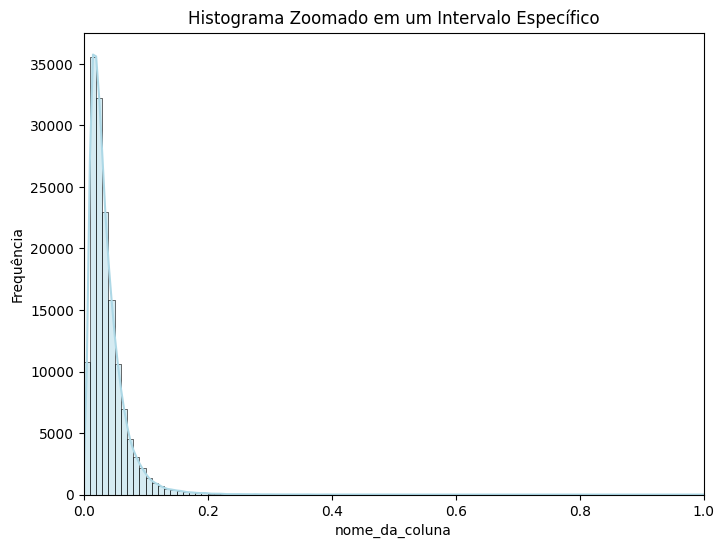

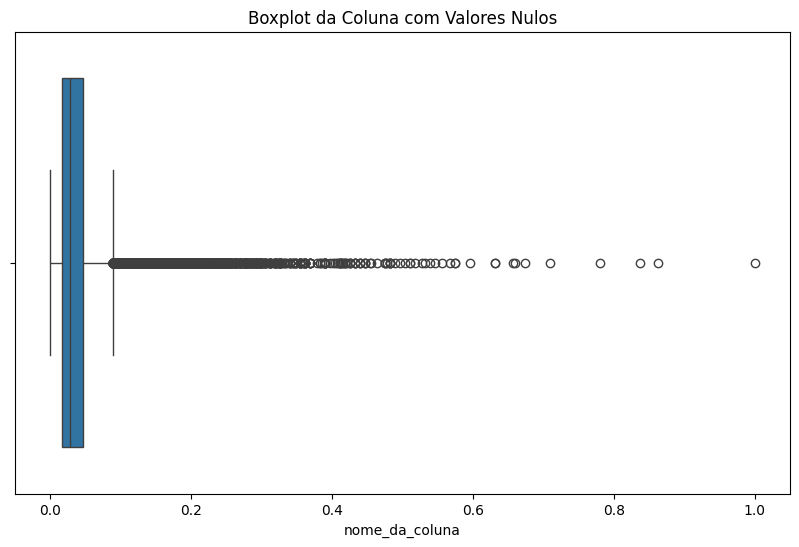

In [ ]:
# Escolha a coluna que você deseja explorar
column_to_explore = 'x15'  # Substitua 'nome_da_coluna' pelo nome da coluna que você quer analisar

# Estatísticas básicas da coluna
print(f"Estatísticas da coluna '{column_to_explore}':")
print(df_train[column_to_explore].describe(include='all'))  # Inclui todas as colunas, incluindo categóricas

# Contagem de NaN
nan_count = df_train[column_to_explore].isna().sum()
nan_percentage = (nan_count / len(df_train)) * 100

print(f"\nContagem de NaN: {nan_count}")
print(f"Porcentagem de NaN: {nan_percentage:.2f}%")

# Plotar histograma para variáveis numéricas
if pd.api.types.is_numeric_dtype(df_train[column_to_explore]):
    plt.figure(figsize=(12, 6))
    plt.hist(df_train[column_to_explore].dropna(), bins=30, color='lightblue', edgecolor='black')
    plt.xlabel(column_to_explore)
    plt.ylabel('Frequência')
    plt.title(f'Histograma de {column_to_explore}')
    plt.grid()
    plt.show()

# Plotar gráfico de barras para variáveis categóricas
elif pd.api.types.is_categorical_dtype(df_train[column_to_explore]) or pd.api.types.is_object_dtype(df_train[column_to_explore]):
    plt.figure(figsize=(12, 6))
    df_train[column_to_explore].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
    plt.xlabel(column_to_explore)
    plt.ylabel('Frequência')
    plt.title(f'Gráfico de Barras de {column_to_explore}')
    plt.grid()
    plt.show()

else:
    print(f"A coluna '{column_to_explore}' não é nem numérica nem categórica.")

# Subplot 2: Histograma
plt.figure(figsize=(8, 6))
sns.histplot(df_train[column_to_explore], bins=100, kde=True, color='lightblue')
plt.xlim(0, 1)  # Ajuste o limite x para focar na área onde os dados estão concentrados
plt.title('Histograma Zoomado em um Intervalo Específico')
plt.xlabel('nome_da_coluna')
plt.ylabel('Frequência')
plt.show()

#boxplot

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_train[column_to_explore])
plt.title('Boxplot da Coluna com Valores Nulos')
plt.xlabel('nome_da_coluna')
plt.show()



# Substituir por mediana


In [ ]:
from sklearn.impute import SimpleImputer

# Defina as colunas que você deseja tratar
columns_to_impute = ['x5']  # Substitua pelos nomes das colunas que você quer imputer

# Criar um imputer para substituir NaN pela mediana
imputer = SimpleImputer(strategy='median')

# Aplicar o imputer às colunas especificadas
df_train[columns_to_impute] = imputer.fit_transform(df_train[columns_to_impute])

# Verificar se os NaNs foram substituídos
print("Verificação das substituições de NaN:")
for col in columns_to_impute:
    nan_count_after = df_train[col].isna().sum()
    print(f"Coluna '{col}': {nan_count_after} NaNs restantes.")


Verificação das substituições de NaN:
Coluna 'x5': 0 NaNs restantes.


# Combinação Mediana e 0

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer

# Parâmetros para concentração de valores e limite de NaN
concentration_threshold = 0.1  # Limite para considerar valores concentrados perto de zero (por exemplo, 10% do valor absoluto)
nan_threshold = 0.3  # Limite de NaN para considerar a substituição da coluna inteira (ex: 30%)

# Criar o imputer para substituir NaN pela mediana
imputer = SimpleImputer(strategy='median')

# Iterar sobre cada coluna do DataFrame
for col in df_train.columns:
    # Verificar a proporção de NaN
    nan_proportion = df_train[col].isna().mean()

    # Verificar a concentração de valores perto de zero
    near_zero_proportion = (abs(df_train[col]) < concentration_threshold).mean()

    # Se a coluna tem muitos NaN e valores concentrados perto de zero, substituímos por 0
    if nan_proportion > nan_threshold and near_zero_proportion > 0.9:  # >90% dos valores estão perto de zero
        df_train[col] = 0
        print(f"Coluna '{col}' substituída por 0 devido à alta concentração de valores perto de zero e muitos NaN.")
    else:
        # Caso contrário, aplicar a mediana nos NaN
        df_train[[col]] = imputer.fit_transform(df_train[[col]])

# Verificar se os NaNs foram substituídos
print("Verificação das substituições de NaN:")
for col in df_train.columns:
    nan_count_after = df_train[col].isna().sum()
    print(f"Coluna '{col}': {nan_count_after} NaNs restantes.")


Verificação das substituições de NaN:
Coluna 'x0': 0 NaNs restantes.
Coluna 'x1': 0 NaNs restantes.
Coluna 'x2': 0 NaNs restantes.
Coluna 'x3': 0 NaNs restantes.
Coluna 'x4': 0 NaNs restantes.
Coluna 'x5': 0 NaNs restantes.
Coluna 'x6': 0 NaNs restantes.
Coluna 'x7': 0 NaNs restantes.
Coluna 'x8': 0 NaNs restantes.
Coluna 'x9': 0 NaNs restantes.
Coluna 'x10': 0 NaNs restantes.
Coluna 'x11': 0 NaNs restantes.
Coluna 'x12': 0 NaNs restantes.
Coluna 'x13': 0 NaNs restantes.
Coluna 'x14': 0 NaNs restantes.
Coluna 'x15': 0 NaNs restantes.
Coluna 'x16': 0 NaNs restantes.
Coluna 'x17': 0 NaNs restantes.
Coluna 'x18': 0 NaNs restantes.
Coluna 'x19': 0 NaNs restantes.
Coluna 'x20': 0 NaNs restantes.
Coluna 'x21': 0 NaNs restantes.
Coluna 'x22': 0 NaNs restantes.
Coluna 'x23': 0 NaNs restantes.
Coluna 'x24': 0 NaNs restantes.
Coluna 'x25': 0 NaNs restantes.
Coluna 'x26': 0 NaNs restantes.
Coluna 'x27': 0 NaNs restantes.
Coluna 'x28': 0 NaNs restantes.
Coluna 'x29': 0 NaNs restantes.
Coluna 'x30'

# Treinamento Puro ajustanbdo Hiperparâmetros


Acurácia no Test Data: 0.8116508468267262
Relatório de Classificação no Test Data:
               precision    recall  f1-score   support

           0       0.62      0.40      0.49      2388
           1       0.84      0.93      0.88      8358

    accuracy                           0.81     10746
   macro avg       0.73      0.67      0.69     10746
weighted avg       0.79      0.81      0.80     10746

AUC-ROC Score: 0.7528160113401017


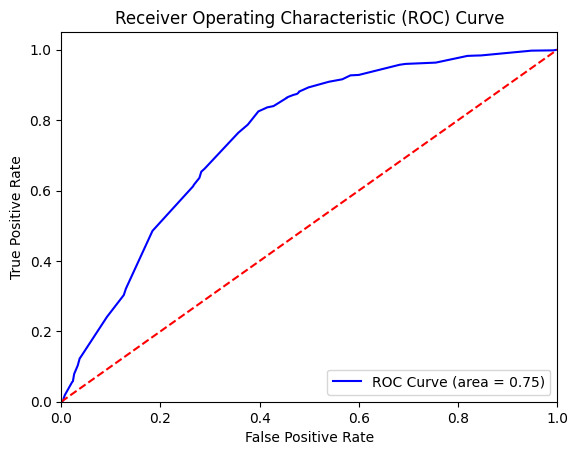

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assumindo que df_train e df_test já estão carregados
# df_train = pd.read_csv('path_to_train_data.csv')
# df_test = pd.read_csv('path_to_test_data.csv')

# Definir as features e a variável target
X_train = df_train.drop(columns=['y'])  # Substitua 'Y' pelo nome correto da sua coluna alvo
y_train = df_train['y']

X_test = df_test.drop(columns=['y'])  # Features no conjunto de teste
y_test = df_test['y']  # Alvo no conjunto de teste

# Treinando o modelo de Árvore de Decisão com hiperparâmetros ajustáveis
dt_classifier = DecisionTreeClassifier(
    criterion='entropy',         # Pode ser 'gini' ou 'entropy'
    max_depth=6,                 # Profundidade máxima ajustada
    min_samples_split=5,         # Mínimo de amostras para dividir um nó
    min_samples_leaf=3,          # Mínimo de amostras por folha
    random_state=42              # Para garantir a reprodutibilidade
)

# Treinando o modelo com os dados de treinamento
dt_classifier.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred_test = dt_classifier.predict(X_test)
y_pred_prob = dt_classifier.predict_proba(X_test)[:, 1]  # Probabilidade para a classe positiva

# Avaliando o desempenho no conjunto de teste
print("Acurácia no Test Data:", accuracy_score(y_test, y_pred_test))
print("Relatório de Classificação no Test Data:\n", classification_report(y_test, y_pred_test))

# Calcular a ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC Score: {roc_auc}")

# Gerar a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Linha de referência (chance)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Usar o ADASYN e o Smote

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from collections import Counter

# Assumindo que df_train e df_test já estão carregados
# df_train = pd.read_csv('path_to_train_data.csv')
# df_test = pd.read_csv('path_to_test_data.csv')

# Definir as features e a variável target
X_train = df_train.drop(columns=['y'])  # Substitua 'y' pelo nome correto da sua coluna alvo
y_train = df_train['y']

X_test = df_test.drop(columns=['y'])  # Features no conjunto de teste
y_test = df_test['y']  # Alvo no conjunto de teste

# Aplicar SMOTE para oversampling da classe minoritária
smote = SMOTE(sampling_strategy=0.2, random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
print(f"Distribuição após o SMOTE: {Counter(y_smote)}")

# Aplicar ADASYN para gerar mais amostras sintéticas em áreas sub-representadas
adasyn = ADASYN(sampling_strategy=0.6, random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X_smote, y_smote)
print(f"Distribuição após o ADASYN: {Counter(y_adasyn)}")

# Treinando o modelo de Árvore de Decisão com hiperparâmetros ajustáveis
dt_classifier = DecisionTreeClassifier(
    criterion='entropy',          # Pode ser 'gini' ou 'entropy'
    max_depth=5,              # Profundidade máxima
    min_samples_split=5,       # Mínimo de amostras para dividir um nó
    min_samples_leaf=3,        # Mínimo de amostras por folha
    random_state=42,            # Para garantir a reprodutibilidade
)

# Treinando o modelo com os dados de treinamento
dt_classifier.fit(X_adasyn, y_adasyn)

# Fazendo previsões no conjunto de teste (df_test)
y_pred_test = dt_classifier.predict(X_test)

# Avaliando o desempenho no conjunto de teste
print("Acurácia no Test Data:", accuracy_score(y_test, y_pred_test))
print("Relatório de Classificação no Test Data:\n", classification_report(y_test, y_pred_test))


Distribuição após o SMOTE: Counter({1.0: 130181, 0.0: 26036})
Distribuição após o ADASYN: Counter({1.0: 130181, 0.0: 74770})
Acurácia no Test Data: 0.7988088591103667
Relatório de Classificação no Test Data:
               precision    recall  f1-score   support

           0       0.57      0.38      0.45      2388
           1       0.84      0.92      0.88      8358

    accuracy                           0.80     10746
   macro avg       0.70      0.65      0.67     10746
weighted avg       0.78      0.80      0.78     10746



AUC-ROC Score: 0.7119947818778024


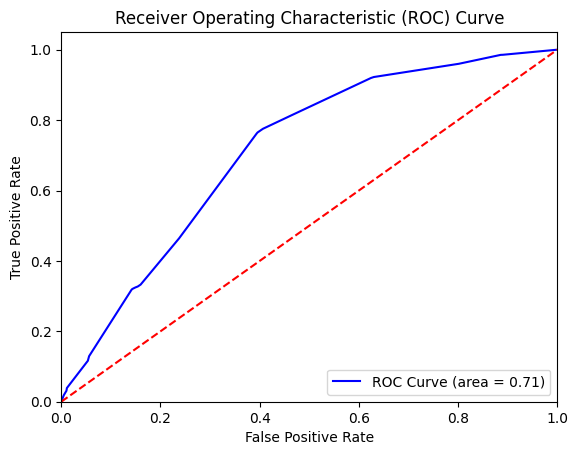

In [ ]:
# Calcular as probabilidades previstas para a classe positiva
y_pred_prob = dt_classifier.predict_proba(X_test)[:, 1]  # Pegando as probabilidades da classe 1

# Calcular a ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC Score: {roc_auc}")

# Gerar a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Linha de referência (chance)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# ADASYN+Smote+Undersample

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from collections import Counter

# Assumindo que df_train e df_test já estão carregados
# df_train = pd.read_csv('path_to_train_data.csv')
# df_test = pd.read_csv('path_to_test_data.csv')

# Definir as features e a variável target
X_train = df_train.drop(columns=['y'])  # Substitua 'Y' pelo nome correto da sua coluna alvo
y_train = df_train['y']

X_test = df_test.drop(columns=['y'])  # Features no conjunto de teste
y_test = df_test['y']  # Alvo no conjunto de teste

# Aplicar SMOTE para oversampling da classe minoritária
smote = SMOTE(sampling_strategy=0.3, random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
print(f"Distribuição após o SMOTE: {Counter(y_smote)}")

# Aplicar ADASYN para gerar mais amostras sintéticas em áreas sub-representadas
adasyn = ADASYN(sampling_strategy=0.4, random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X_smote, y_smote)
print(f"Distribuição após o ADASYN: {Counter(y_adasyn)}")

# Aplicar RandomUnderSampler para reduzir a classe majoritária
undersample = RandomUnderSampler(sampling_strategy=0.6, random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X_adasyn, y_adasyn)
print(f"Distribuição após o undersampling: {Counter(y_resampled)}")

# Treinando o modelo de Árvore de Decisão com hiperparâmetros ajustáveis
dt_classifier = DecisionTreeClassifier(
    criterion='entropy',         # Pode ser 'gini' ou 'entropy'
    max_depth=6,              # Profundidade máxima ajustada
    min_samples_split=5,       # Mínimo de amostras para dividir um nó
    min_samples_leaf=3,         # Mínimo de amostras por folha
    random_state=42             # Para garantir a reprodutibilidade
)

# Treinando o modelo com os dados de treinamento
dt_classifier.fit(X_resampled, y_resampled)

# Fazendo previsões no conjunto de teste (df_test)
y_pred_test = dt_classifier.predict(X_test)

# Avaliando o desempenho no conjunto de teste
print("Acurácia no Test Data:", accuracy_score(y_test, y_pred_test))
print("Relatório de Classificação no Test Data:\n", classification_report(y_test, y_pred_test))



Distribuição após o SMOTE: Counter({1.0: 130181, 0.0: 39054})
Distribuição após o ADASYN: Counter({1.0: 130181, 0.0: 52998})
Distribuição após o undersampling: Counter({1.0: 88330, 0.0: 52998})
Acurácia no Test Data: 0.7896891866741113
Relatório de Classificação no Test Data:
               precision    recall  f1-score   support

           0       0.53      0.47      0.50      2388
           1       0.85      0.88      0.87      8358

    accuracy                           0.79     10746
   macro avg       0.69      0.67      0.68     10746
weighted avg       0.78      0.79      0.78     10746



AUC-ROC Score: 0.7117873055554553


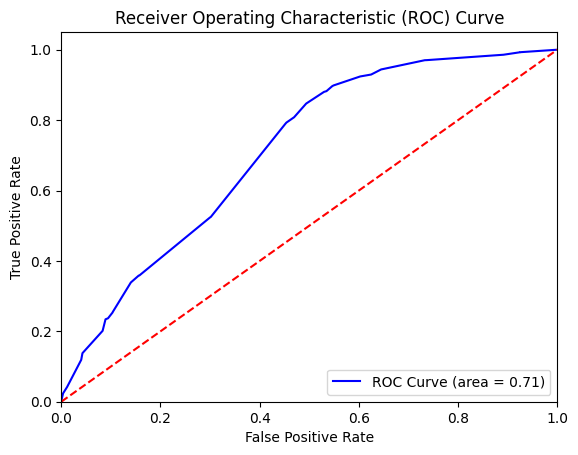

In [ ]:
# Calcular as probabilidades previstas para a classe positiva
y_pred_prob = dt_classifier.predict_proba(X_test)[:, 1]  # Pegando as probabilidades da classe 1

# Calcular a ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC Score: {roc_auc}")

# Gerar a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Linha de referência (chance)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Aumentar os hiperparâmetros

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from collections import Counter

# Assumindo que df_train e df_test já estão carregados
# df_train = pd.read_csv('path_to_train_data.csv')
# df_test = pd.read_csv('path_to_test_data.csv')

# Definir as features e a variável target
X_train = df_train.drop(columns=['y'])  # Substitua 'Y' pelo nome correto da sua coluna alvo
y_train = df_train['y']

X_test = df_test.drop(columns=['y'])  # Features no conjunto de teste
y_test = df_test['y']  # Alvo no conjunto de teste


# Aplicar RandomUnderSampler para reduzir a classe majoritária
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)
print(f"Distribuição após o undersampling: {Counter(y_resampled)}")

# Treinando o modelo de Árvore de Decisão com hiperparâmetros ajustáveis
dt_classifier = DecisionTreeClassifier(
    criterion='entropy',         # Pode ser 'gini' ou 'entropy'
    max_depth=20,              # Profundidade máxima ajustada
    min_samples_split=10,       # Mínimo de amostras para dividir um nó
    min_samples_leaf=5,         # Mínimo de amostras por folha
    random_state=42             # Para garantir a reprodutibilidade
)

# Treinando o modelo com os dados de treinamento
dt_classifier.fit(X_resampled, y_resampled)

# Fazendo previsões no conjunto de teste (df_test)
y_pred_test = dt_classifier.predict(X_test)

# Avaliando o desempenho no conjunto de teste
print("Acurácia no Test Data:", accuracy_score(y_test, y_pred_test))
print("Relatório de Classificação no Test Data:\n", classification_report(y_test, y_pred_test))

Distribuição após o undersampling: Counter({0.0: 21857, 1.0: 21857})
Acurácia no Test Data: 0.5487623301693654
Relatório de Classificação no Test Data:
               precision    recall  f1-score   support

           0       0.29      0.73      0.42      2388
           1       0.87      0.50      0.63      8358

    accuracy                           0.55     10746
   macro avg       0.58      0.61      0.53     10746
weighted avg       0.74      0.55      0.58     10746



AUC-ROC Score: 0.6556613779995135


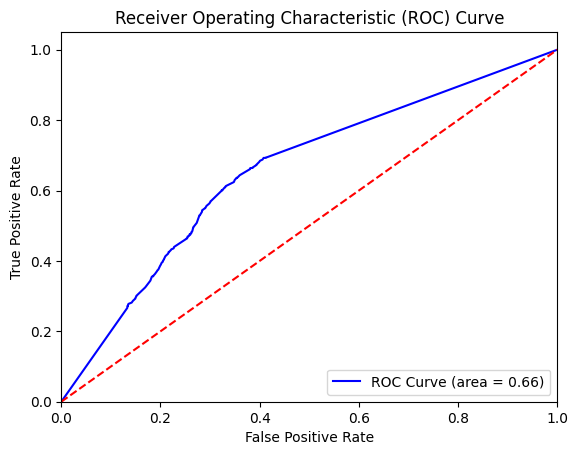

In [ ]:
# Calcular as probabilidades previstas para a classe positiva
y_pred_prob = dt_classifier.predict_proba(X_test)[:, 1]  # Pegando as probabilidades da classe 1

# Calcular a ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC Score: {roc_auc}")

# Gerar a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Linha de referência (chance)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Smote+ADASYN e Tomek+RadomUndersample

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from collections import Counter

# Assumindo que df_train e df_test já estão carregados
# df_train = pd.read_csv('path_to_train_data.csv')
# df_test = pd.read_csv('path_to_test_data.csv')

# Definir as features e a variável target
X_train = df_train.drop(columns=['y'])  # Substitua 'Y' pelo nome correto da sua coluna alvo
y_train = df_train['y']

X_test = df_test.drop(columns=['y'])  # Features no conjunto de teste
y_test = df_test['y']  # Alvo no conjunto de teste

# Aplicar SMOTE para oversampling da classe minoritária (ajustando o foco para a fronteira)
smote = SMOTE(sampling_strategy=0.3, random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
print(f"Distribuição após o SMOTE: {Counter(y_smote)}")

# Aplicar ADASYN para gerar mais amostras sintéticas em áreas sub-representadas
adasyn = ADASYN(sampling_strategy=0.4, random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X_smote, y_smote)
print(f"Distribuição após o ADASYN: {Counter(y_adasyn)}")

# Aplicar Tomek Links para remover pares de amostras conflitantes nas fronteiras
tomek = TomekLinks(sampling_strategy='auto')
X_tomek, y_tomek = tomek.fit_resample(X_adasyn, y_adasyn)
print(f"Distribuição após Tomek Links: {Counter(y_tomek)}")

# Aplicar RandomUnderSampler para reduzir a classe majoritária
undersample = RandomUnderSampler(sampling_strategy=0.6, random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X_tomek, y_tomek)
print(f"Distribuição após o undersampling: {Counter(y_resampled)}")

# Treinando o modelo de Árvore de Decisão com hiperparâmetros ajustáveis
dt_classifier = DecisionTreeClassifier(
    criterion='entropy',         # Pode ser 'gini' ou 'entropy'
    max_depth=6,                 # Profundidade máxima ajustada
    min_samples_split=5,         # Mínimo de amostras para dividir um nó
    min_samples_leaf=3,          # Mínimo de amostras por folha
    random_state=42              # Para garantir a reprodutibilidade
)

# Treinando o modelo com os dados de treinamento
dt_classifier.fit(X_resampled, y_resampled)

# Fazendo previsões no conjunto de teste (df_test)
y_pred_test = dt_classifier.predict(X_test)

# Avaliando o desempenho no conjunto de teste
print("Acurácia no Test Data:", accuracy_score(y_test, y_pred_test))
print("Relatório de Classificação no Test Data:\n", classification_report(y_test, y_pred_test))


Distribuição após o SMOTE: Counter({1.0: 130181, 0.0: 39054})
Distribuição após o ADASYN: Counter({1.0: 130181, 0.0: 52998})
Distribuição após Tomek Links: Counter({1.0: 129521, 0.0: 52998})
Distribuição após o undersampling: Counter({1.0: 88330, 0.0: 52998})
Acurácia no Test Data: 0.7694956262795459
Relatório de Classificação no Test Data:
               precision    recall  f1-score   support

           0       0.48      0.55      0.52      2388
           1       0.87      0.83      0.85      8358

    accuracy                           0.77     10746
   macro avg       0.68      0.69      0.68     10746
weighted avg       0.78      0.77      0.77     10746



AUC-ROC Score: 0.7249083667119196


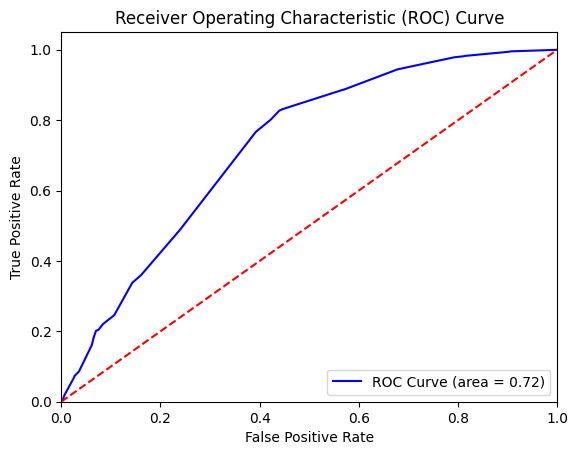

In [ ]:
# Calcular as probabilidades previstas para a classe positiva
y_pred_prob = dt_classifier.predict_proba(X_test)[:, 1]  # Pegando as probabilidades da classe 1

# Calcular a ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC Score: {roc_auc}")

# Gerar a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Linha de referência (chance)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Selecionar algumas features

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from collections import Counter

# Assumindo que df_train e df_test já estão carregados
# df_train = pd.read_csv('path_to_train_data.csv')
# df_test = pd.read_csv('path_to_test_data.csv')

# Definir as features específicas com base na importância
selected_features = ['x0', 'x5', 'x25', 'x7', 'x11', 'x12', 'x40', 'x8', 'x23', 'x33',
                     'x10', 'x15', 'x18', 'x2', 'x59', 'x9', 'x43', 'x21', 'x3', 'x17']

# Usar apenas as features selecionadas no treinamento
X_train = df_train[selected_features]
y_train = df_train['y']

X_test = df_test[selected_features]
y_test = df_test['y']

# Aplicar SMOTE para oversampling da classe minoritária (ajustando o foco para a fronteira)
smote = SMOTE(sampling_strategy=0.3, random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
print(f"Distribuição após o SMOTE: {Counter(y_smote)}")

# Aplicar ADASYN para gerar mais amostras sintéticas em áreas sub-representadas
adasyn = ADASYN(sampling_strategy=0.4, random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X_smote, y_smote)
print(f"Distribuição após o ADASYN: {Counter(y_adasyn)}")

# Aplicar Tomek Links para remover pares de amostras conflitantes nas fronteiras
tomek = TomekLinks(sampling_strategy='auto')
X_tomek, y_tomek = tomek.fit_resample(X_adasyn, y_adasyn)
print(f"Distribuição após Tomek Links: {Counter(y_tomek)}")

# Aplicar RandomUnderSampler para reduzir a classe majoritária
undersample = RandomUnderSampler(sampling_strategy=0.6, random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X_tomek, y_tomek)
print(f"Distribuição após o undersampling: {Counter(y_resampled)}")

# Treinando o modelo de Árvore de Decisão com as features selecionadas
dt_classifier = DecisionTreeClassifier(
    criterion='entropy',         # Pode ser 'gini' ou 'entropy'
    max_depth=6,                 # Profundidade máxima ajustada
    min_samples_split=5,         # Mínimo de amostras para dividir um nó
    min_samples_leaf=3,          # Mínimo de amostras por folha
    random_state=42              # Para garantir a reprodutibilidade
)

# Treinando o modelo com os dados de treinamento
dt_classifier.fit(X_resampled, y_resampled)

# Fazendo previsões no conjunto de teste (df_test)
y_pred_test = dt_classifier.predict(X_test)

# Avaliando o desempenho no conjunto de teste
print("Acurácia no Test Data:", accuracy_score(y_test, y_pred_test))
print("Relatório de Classificação no Test Data:\n", classification_report(y_test, y_pred_test))


Distribuição após o SMOTE: Counter({1.0: 130181, 0.0: 39054})
Distribuição após o ADASYN: Counter({1.0: 130181, 0.0: 46845})
Distribuição após Tomek Links: Counter({1.0: 128904, 0.0: 46845})
Distribuição após o undersampling: Counter({1.0: 78075, 0.0: 46845})
Acurácia no Test Data: 0.6942117997394379
Relatório de Classificação no Test Data:
               precision    recall  f1-score   support

           0       0.39      0.69      0.50      2388
           1       0.89      0.70      0.78      8358

    accuracy                           0.69     10746
   macro avg       0.64      0.69      0.64     10746
weighted avg       0.78      0.69      0.72     10746



AUC-ROC Score: 0.7311446560392294


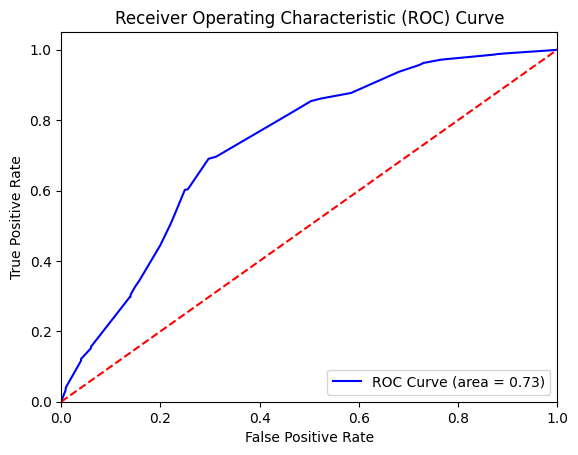

In [ ]:
# Calcular as probabilidades previstas para a classe positiva
y_pred_prob = dt_classifier.predict_proba(X_test)[:, 1]  # Pegando as probabilidades da classe 1

# Calcular a ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC Score: {roc_auc}")

# Gerar a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Linha de referência (chance)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

AUC-ROC Score: 0.7311446560392294


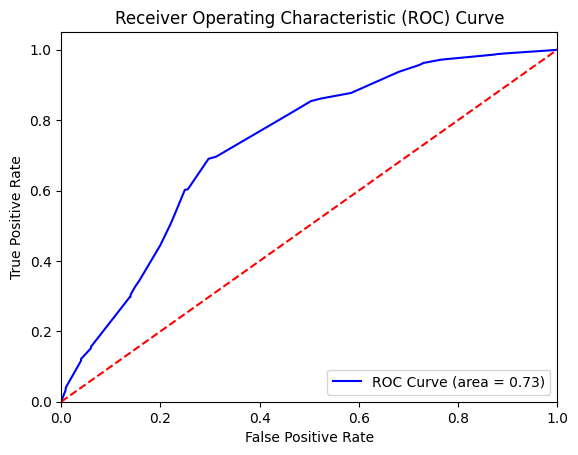

In [ ]:
# Calcular as probabilidades previstas para a classe positiva
y_pred_prob = dt_classifier.predict_proba(X_test)[:, 1]  # Pegando as probabilidades da classe 1

# Calcular a ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC Score: {roc_auc}")

# Gerar a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Linha de referência (chance)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Borderline-SMOTE+ADASYN e Randomsample

In [ ]:
import pandas as pd
from imblearn.over_sampling import BorderlineSMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from collections import Counter

# Assumindo que df_train e df_test já estão carregados
# df_train = pd.read_csv('path_to_train_data.csv')
# df_test = pd.read_csv('path_to_test_data.csv')

# Definir as features e a variável target
X_train = df_train.drop(columns=['y'])  # Substitua 'Y' pelo nome correto da sua coluna alvo
y_train = df_train['y']

X_test = df_test.drop(columns=['y'])  # Features no conjunto de teste
y_test = df_test['y']  # Alvo no conjunto de teste

# Aplicar Borderline-SMOTE para oversampling da classe minoritária
borderline_smote = BorderlineSMOTE(sampling_strategy=0.4, random_state=42, kind='borderline-1')
X_border_smote, y_border_smote = borderline_smote.fit_resample(X_train, y_train)
print(f"Distribuição após o Borderline-SMOTE: {Counter(y_border_smote)}")

# Aplicar ADASYN para gerar mais amostras sintéticas em áreas sub-representadas
adasyn = ADASYN(sampling_strategy= 'auto', random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X_border_smote, y_border_smote)
print(f"Distribuição após o ADASYN: {Counter(y_adasyn)}")


# Aplicar RandomUnderSampler para reduzir a classe majoritária
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X_adasyn, y_adasyn)
print(f"Distribuição após o undersampling: {Counter(y_resampled)}")

# Treinando o modelo de Árvore de Decisão com hiperparâmetros ajustáveis
dt_classifier = DecisionTreeClassifier(
    criterion='entropy',         # Pode ser 'gini' ou 'entropy'
    max_depth=6,                 # Profundidade máxima ajustada
    min_samples_split=5,         # Mínimo de amostras para dividir um nó
    min_samples_leaf=3,          # Mínimo de amostras por folha
    random_state=42              # Para garantir a reprodutibilidade
)

# Treinando o modelo com os dados de treinamento
dt_classifier.fit(X_resampled, y_resampled)

# Fazendo previsões no conjunto de teste (df_test)
y_pred_test = dt_classifier.predict(X_test)

# Avaliando o desempenho no conjunto de teste
print("Acurácia no Test Data:", accuracy_score(y_test, y_pred_test))
print("Relatório de Classificação no Test Data:\n", classification_report(y_test, y_pred_test))


Distribuição após o Borderline-SMOTE: Counter({1.0: 130181, 0.0: 52072})
Distribuição após o ADASYN: Counter({1.0: 130181, 0.0: 129441})
Distribuição após o undersampling: Counter({0.0: 129441, 1.0: 129441})
Acurácia no Test Data: 0.5823562255723059
Relatório de Classificação no Test Data:
               precision    recall  f1-score   support

           0       0.30      0.64      0.40      2388
           1       0.84      0.57      0.68      8358

    accuracy                           0.58     10746
   macro avg       0.57      0.60      0.54     10746
weighted avg       0.72      0.58      0.62     10746



AUC-ROC Score: 0.6401249788064515


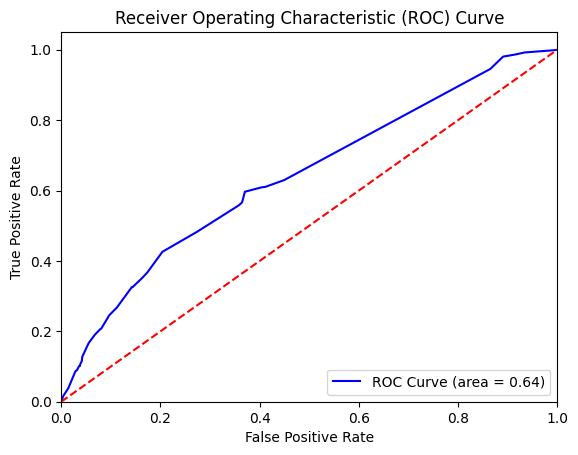

In [ ]:
# Calcular as probabilidades previstas para a classe positiva
y_pred_prob = dt_classifier.predict_proba(X_test)[:, 1]  # Pegando as probabilidades da classe 1

# Calcular a ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC Score: {roc_auc}")

# Gerar a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Linha de referência (chance)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Ajuste de Trheshold

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Prever as probabilidades no conjunto de teste
y_pred_prob = dt_classifier.predict_proba(X_test)[:, 1]  # Probabilidade para a classe 1

# Ajustar o threshold para melhorar a precisão da classe 0
threshold = 0.3  # Um threshold mais alto favorece a classe 0
y_pred_threshold = np.where(y_pred_prob > threshold, 1, 0)  # Classifica 1 se a probabilidade for maior que o threshold, senão 0

# Avaliar o modelo com o novo threshold
print(f"Acurácia no Test Data com threshold {threshold}: {accuracy_score(y_test, y_pred_threshold)}")
print("Relatório de Classificação com novo threshold:\n", classification_report(y_test, y_pred_threshold))

# Exibir matriz de confusão
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_threshold))


Acurácia no Test Data com threshold 0.3: 0.7868043923320305
Relatório de Classificação com novo threshold:
               precision    recall  f1-score   support

           0       0.61      0.11      0.19      2388
           1       0.79      0.98      0.88      8358

    accuracy                           0.79     10746
   macro avg       0.70      0.54      0.53     10746
weighted avg       0.75      0.79      0.72     10746

Matriz de Confusão:
 [[ 261 2127]
 [ 164 8194]]


# Reduzir hiperparâmetros

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from collections import Counter

# Assumindo que df_train e df_test já estão carregados
# df_train = pd.read_csv('path_to_train_data.csv')
# df_test = pd.read_csv('path_to_test_data.csv')

# Definir as features e a variável target
X_train = df_train.drop(columns=['y'])  # Substitua 'Y' pelo nome correto da sua coluna alvo
y_train = df_train['y']

X_test = df_test.drop(columns=['y'])  # Features no conjunto de teste
y_test = df_test['y']  # Alvo no conjunto de teste

# Aplicar SMOTE para oversampling da classe minoritária
smote = SMOTE(sampling_strategy=0.3, random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
print(f"Distribuição após o SMOTE: {Counter(y_smote)}")

# Aplicar ADASYN para gerar mais amostras sintéticas em áreas sub-representadas
adasyn = ADASYN(sampling_strategy=0.4, random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X_smote, y_smote)
print(f"Distribuição após o ADASYN: {Counter(y_adasyn)}")

# Aplicar RandomUnderSampler para reduzir a classe majoritária
undersample = RandomUnderSampler(sampling_strategy=0.6, random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X_adasyn, y_adasyn)
print(f"Distribuição após o undersampling: {Counter(y_resampled)}")

# Treinando o modelo de Árvore de Decisão com hiperparâmetros ajustáveis
dt_classifier = DecisionTreeClassifier(
    criterion='entropy',         # Pode ser 'gini' ou 'entropy'
    max_depth=6,              # Profundidade máxima ajustada
    min_samples_split=5,       # Mínimo de amostras para dividir um nó
    min_samples_leaf=3,         # Mínimo de amostras por folha
    random_state=42             # Para garantir a reprodutibilidade
)

# Treinando o modelo com os dados de treinamento
dt_classifier.fit(X_resampled, y_resampled)

# Fazendo previsões no conjunto de teste (df_test)
y_pred_test = dt_classifier.predict(X_test)

# Avaliando o desempenho no conjunto de teste
print("Acurácia no Test Data:", accuracy_score(y_test, y_pred_test))
print("Relatório de Classificação no Test Data:\n", classification_report(y_test, y_pred_test))

Distribuição após o SMOTE: Counter({1.0: 130181, 0.0: 39054})
Distribuição após o ADASYN: Counter({1.0: 130181, 0.0: 52998})
Distribuição após o undersampling: Counter({1.0: 88330, 0.0: 52998})
Acurácia no Test Data: 0.7896891866741113
Relatório de Classificação no Test Data:
               precision    recall  f1-score   support

           0       0.53      0.47      0.50      2388
           1       0.85      0.88      0.87      8358

    accuracy                           0.79     10746
   macro avg       0.69      0.67      0.68     10746
weighted avg       0.78      0.79      0.78     10746



# Combinação de tudo

Distribuição após o SMOTE: Counter({1.0: 130181, 0.0: 39054})
Distribuição após o ADASYN: Counter({1.0: 130181, 0.0: 52998})
Distribuição após o undersampling: Counter({1.0: 88330, 0.0: 52998})


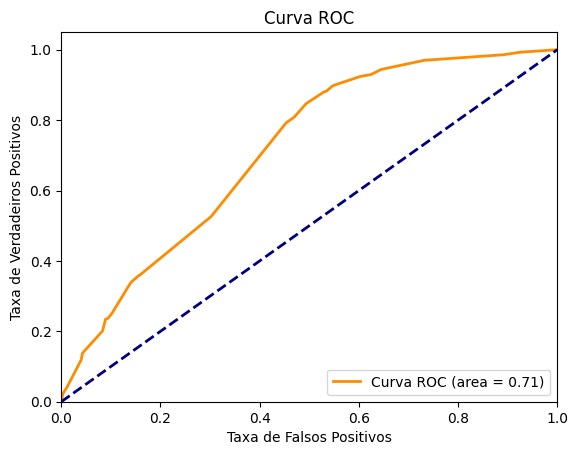

Threshold otimizado: 0.5790993071593533
Acurácia no Test Data com threshold 0.5790993071593533: 0.7465103294249023
Relatório de Classificação com novo threshold:
               precision    recall  f1-score   support

           0       0.44      0.53      0.48      2388
           1       0.86      0.81      0.83      8358

    accuracy                           0.75     10746
   macro avg       0.65      0.67      0.66     10746
weighted avg       0.77      0.75      0.75     10746



In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from collections import Counter

# Assumindo que df_train e df_test já estão carregados
# df_train = pd.read_csv('path_to_train_data.csv')
# df_test = pd.read_csv('path_to_test_data.csv')

# Definir as features e a variável target
X_train = df_train.drop(columns=['y'])  # Substitua 'Y' pelo nome correto da sua coluna alvo
y_train = df_train['y']

X_test = df_test.drop(columns=['y'])  # Features no conjunto de teste
y_test = df_test['y']  # Alvo no conjunto de teste

# Aplicar SMOTE para oversampling da classe minoritária
smote = SMOTE(sampling_strategy=0.3, random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
print(f"Distribuição após o SMOTE: {Counter(y_smote)}")

# Aplicar ADASYN para gerar mais amostras sintéticas em áreas sub-representadas
adasyn = ADASYN(sampling_strategy=0.4, random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X_smote, y_smote)
print(f"Distribuição após o ADASYN: {Counter(y_adasyn)}")

# Aplicar RandomUnderSampler para reduzir a classe majoritária
undersample = RandomUnderSampler(sampling_strategy=0.6, random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X_adasyn, y_adasyn)
print(f"Distribuição após o undersampling: {Counter(y_resampled)}")

# Treinando o modelo de Árvore de Decisão com hiperparâmetros ajustáveis
dt_classifier = DecisionTreeClassifier(
    criterion='entropy',         # Pode ser 'gini' ou 'entropy'
    max_depth=6,              # Profundidade máxima ajustada
    min_samples_split=5,       # Mínimo de amostras para dividir um nó
    min_samples_leaf=3,         # Mínimo de amostras por folha
    random_state=42             # Para garantir a reprodutibilidade
)

# Treinando o modelo com os dados de treinamento
dt_classifier.fit(X_resampled, y_resampled)

# Fazendo previsões no conjunto de teste (df_test)
y_pred_prob = dt_classifier.predict_proba(X_test)[:, 1]  # Probabilidades para a classe 1

# Plotando a Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Ajustando o threshold
optimal_idx = np.argmax(tpr - fpr)  # Encontrar o threshold ideal baseado no melhor trade-off entre TPR e FPR
optimal_threshold = thresholds[optimal_idx]

# Aplicando o novo threshold
y_pred_threshold = np.where(y_pred_prob > optimal_threshold, 1, 0)

# Avaliando o desempenho com o novo threshold
print(f"Threshold otimizado: {optimal_threshold}")
print(f"Acurácia no Test Data com threshold {optimal_threshold}: {accuracy_score(y_test, y_pred_threshold)}")
print("Relatório de Classificação com novo threshold:\n", classification_report(y_test, y_pred_threshold))


# RadomSearch

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Assumindo que df_train e df_test já estão carregados
# df_train = pd.read_csv('path_to_train_data.csv')
# df_test = pd.read_csv('path_to_test_data.csv')

# Definir as features e a variável target
X_train = df_train.drop(columns=['y'])  # Substitua 'y' pelo nome correto da sua coluna alvo
y_train = df_train['y']

X_test = df_test.drop(columns=['y'])  # Features no conjunto de teste
y_test = df_test['y']  # Alvo no conjunto de teste

# Parâmetros para busca aleatória
param_distributions = {
    'criterion': ['gini', 'entropy'],          # Critério de divisão
    'max_depth': [None, 3, 5, 6, 10],           # Profundidade máxima
    'min_samples_split': [2, 5, 10],            # Mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 3, 5],           # Mínimo de amostras por folha
}

# Criar o modelo de árvore de decisão
dt_classifier = DecisionTreeClassifier(random_state=42)

# Implementar RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=dt_classifier,
    param_distributions=param_distributions,
    n_iter=100,  # Número de iterações (combinações) a serem testadas
    scoring='accuracy',  # Métrica para otimização
    cv=5,  # Número de folds para cross-validation
    random_state=42,
    n_jobs=-1  # Usa todos os núcleos disponíveis
)

# Treinando o modelo com Randomized Search
random_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_dt_classifier = random_search.best_estimator_

# Fazendo previsões no conjunto de teste
y_pred_test = best_dt_classifier.predict(X_test)

# Avaliando o desempenho no conjunto de teste
print("Melhores hiperparâmetros encontrados:", random_search.best_params_)
print("Acurácia no Test Data:", accuracy_score(y_test, y_pred_test))
print("Relatório de Classificação no Test Data:\n", classification_report(y_test, y_pred_test))

# Prever as probabilidades no conjunto de teste para ajuste de threshold
y_pred_prob = best_dt_classifier.predict_proba(X_test)[:, 1]  # Probabilidade para a classe 1

# Ajustar o threshold
threshold = 0.5  # Você pode ajustar isso conforme necessário
y_pred_threshold = np.where(y_pred_prob > threshold, 1, 0)

# Avaliar o desempenho com o novo threshold
print("Acurácia no Test Data com threshold:", accuracy_score(y_test, y_pred_threshold))
print("Relatório de Classificação com novo threshold:\n", classification_report(y_test, y_pred_threshold))


Melhores hiperparâmetros encontrados: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 6, 'criterion': 'entropy'}
Acurácia no Test Data: 0.8115577889447236
Relatório de Classificação no Test Data:
               precision    recall  f1-score   support

           0       0.62      0.40      0.49      2388
           1       0.84      0.93      0.88      8358

    accuracy                           0.81     10746
   macro avg       0.73      0.67      0.69     10746
weighted avg       0.79      0.81      0.80     10746

Acurácia no Test Data com threshold: 0.8115577889447236
Relatório de Classificação com novo threshold:
               precision    recall  f1-score   support

           0       0.62      0.40      0.49      2388
           1       0.84      0.93      0.88      8358

    accuracy                           0.81     10746
   macro avg       0.73      0.67      0.69     10746
weighted avg       0.79      0.81      0.80     10746



In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Assumindo que df_train e df_test já estão carregados
# df_train = pd.read_csv('path_to_train_data.csv')
# df_test = pd.read_csv('path_to_test_data.csv')

# Definir as features e a variável target
X_train = df_train.drop(columns=['y'])  # Substitua 'y' pelo nome correto da sua coluna alvo
y_train = df_train['y']

X_test = df_test.drop(columns=['y'])  # Features no conjunto de teste
y_test = df_test['y']  # Alvo no conjunto de teste

# Parâmetros para busca aleatória
param_distributions = {
    'criterion': ['gini', 'entropy'],          # Critério de divisão
    'max_depth': [None, 3, 5, 6, 10],           # Profundidade máxima
    'min_samples_split': [2, 5, 10],            # Mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 3, 5],           # Mínimo de amostras por folha
}

# Criar o modelo de árvore de decisão
dt_classifier = DecisionTreeClassifier(random_state=42)

# Implementar RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=dt_classifier,
    param_distributions=param_distributions,
    n_iter=100,  # Número de iterações (combinações) a serem testadas
    scoring='accuracy',  # Métrica para otimização
    cv=5,  # Número de folds para cross-validation
    random_state=42,
    n_jobs=-1  # Usa todos os núcleos disponíveis
)

# Treinando o modelo com Randomized Search
random_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_dt_classifier = random_search.best_estimator_

# Fazendo previsões no conjunto de teste
y_pred_test = best_dt_classifier.predict(X_test)

# Avaliando o desempenho no conjunto de teste
print("Melhores hiperparâmetros encontrados:", random_search.best_params_)
print("Acurácia no Test Data:", accuracy_score(y_test, y_pred_test))
print("Relatório de Classificação no Test Data:\n", classification_report(y_test, y_pred_test))

# Prever as probabilidades no conjunto de teste para ajuste de threshold
y_pred_prob = best_dt_classifier.predict_proba(X_test)[:, 1]  # Probabilidade para a classe 1

# Ajustar o threshold
threshold = 0.5  # Você pode ajustar isso conforme necessário
y_pred_threshold = np.where(y_pred_prob > threshold, 1, 0)

# Avaliar o desempenho com o novo threshold
print("Acurácia no Test Data com threshold:", accuracy_score(y_test, y_pred_threshold))
print("Relatório de Classificação com novo threshold:\n", classification_report(y_test, y_pred_threshold))


Melhores hiperparâmetros encontrados: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 6, 'criterion': 'entropy'}
Acurácia no Test Data: 0.8115577889447236
Relatório de Classificação no Test Data:
               precision    recall  f1-score   support

           0       0.62      0.40      0.49      2388
           1       0.84      0.93      0.88      8358

    accuracy                           0.81     10746
   macro avg       0.73      0.67      0.69     10746
weighted avg       0.79      0.81      0.80     10746

Acurácia no Test Data com threshold: 0.8115577889447236
Relatório de Classificação com novo threshold:
               precision    recall  f1-score   support

           0       0.62      0.40      0.49      2388
           1       0.84      0.93      0.88      8358

    accuracy                           0.81     10746
   macro avg       0.73      0.67      0.69     10746
weighted avg       0.79      0.81      0.80     10746



In [ ]:
# Ajustar o threshold
threshold = 0.3  # Você pode ajustar isso conforme necessário
y_pred_threshold = np.where(y_pred_prob > threshold, 1, 0)

# Avaliar o desempenho com o novo threshold
print("Acurácia no Test Data com threshold:", accuracy_score(y_test, y_pred_threshold))
print("Relatório de Classificação com novo threshold:\n", classification_report(y_test, y_pred_threshold))

Acurácia no Test Data com threshold: 0.8040201005025126
Relatório de Classificação com novo threshold:
               precision    recall  f1-score   support

           0       0.74      0.18      0.29      2388
           1       0.81      0.98      0.89      8358

    accuracy                           0.80     10746
   macro avg       0.78      0.58      0.59     10746
weighted avg       0.79      0.80      0.75     10746

